# HOUSING PRICE PREDICTION




## IMPORTING REQUIRED LIBRARIES

In [812]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
DeprecationWarning('ignore')
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (5,5)

## LOADING DATASET

In [813]:
df1=pd.read_csv("House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [814]:
df1.shape

(13320, 9)

## There are 13320 rows with 9 columns i.e. features

In [815]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## DATA CLEANING

## Setting up our required data

In [816]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## There are some missing values in the data

<AxesSubplot:>

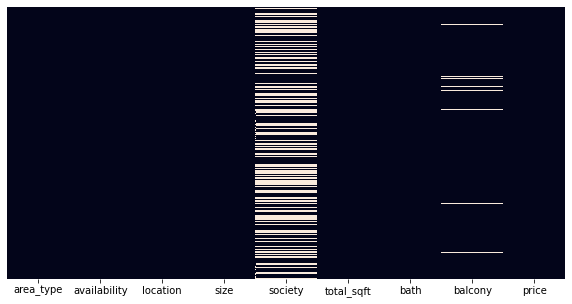

In [817]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

## Dealing with the missing values

In [818]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [819]:
df1['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Goyalir     1
Vanami      1
Amhidte     1
GaentAp     1
AuRISa      1
Name: society, Length: 2688, dtype: int64

In [820]:
df1['society'].describe()

count        7818
unique       2688
top       GrrvaGr
freq           80
Name: society, dtype: object

In [821]:
x=df1['society'].isnull().sum()
x

5502

In [822]:
y=df1['society'].count()
y=y-x
y

2316

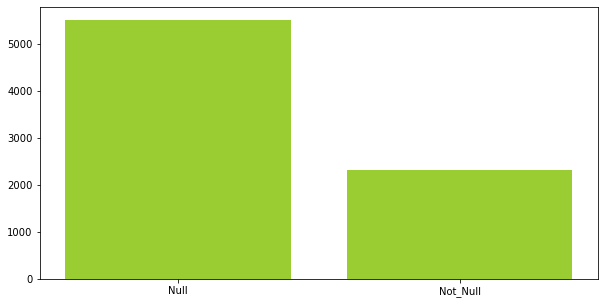

In [823]:
plot1=np.array([x,y])
plot2=np.array(["Null","Not_Null"])
plt.bar(plot2,plot1,color="yellowgreen")
plt.show()


####  society feature can be dropped

<AxesSubplot:xlabel='bath', ylabel='count'>

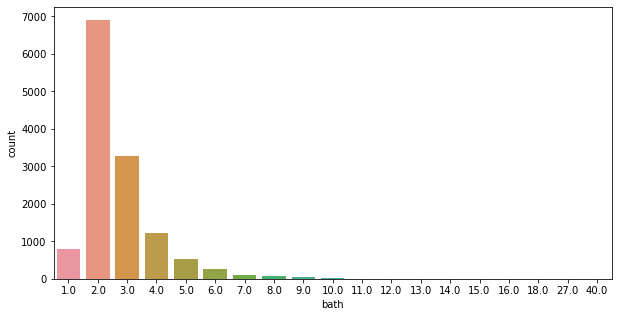

In [824]:
sns.countplot(x=df1['bath'])

<AxesSubplot:xlabel='balcony', ylabel='count'>

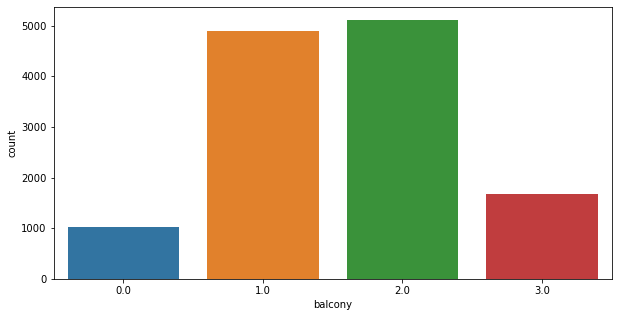

In [825]:
sns.countplot(x=df1['balcony'])

In [826]:
df1['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [827]:
df1['balcony'].isnull().sum()

609

In [828]:
df = df1.copy()
df1['size'].isnull().value_counts()

False    13304
True        16
Name: size, dtype: int64

In [829]:
df1['price'].value_counts()

75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
45.69       1
85.41       1
91.31       1
102.92      1
62.28       1
Name: price, Length: 1994, dtype: int64

<AxesSubplot:ylabel='Frequency'>

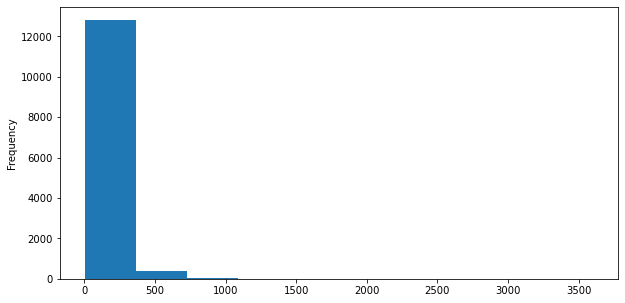

In [830]:
df1['price'].plot.hist()

In [831]:
df1.corr()["price"].sort_values(ascending=False)

price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64

#### balcony feature can be dropped 
#### assuming area_type and availability are not affecting prices much

## Removing unwanted columns

In [832]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [833]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [834]:
df2.shape

(13320, 5)

#### since the rows with null values are less as compared to total samples we consider removing the rows

<AxesSubplot:>

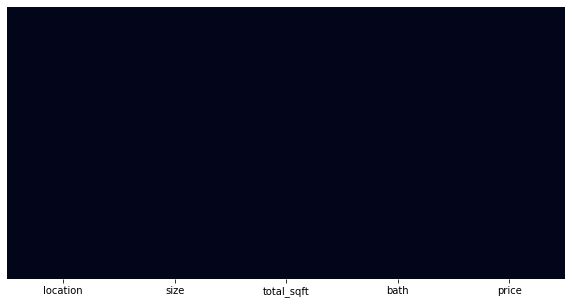

In [835]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False)

#### Null values removed

In [836]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Heatmap shows that there are no missing values

<AxesSubplot:>

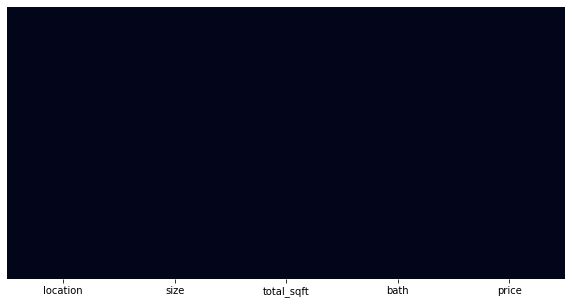

In [837]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False)

In [755]:
df3.shape

(13246, 5)

### Now we are left with 13246 samples and 5 features


## Finalizing our dataset

In [756]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Adding a feature bhk by extracting numerical part from  size

In [757]:
def function_to_get_numerical_part(x):
    return int(x.split(' ')[0])

In [758]:
df3['bhk']=df3['size'].apply(function_to_get_numerical_part)

In [759]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [760]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

<AxesSubplot:xlabel='bhk', ylabel='count'>

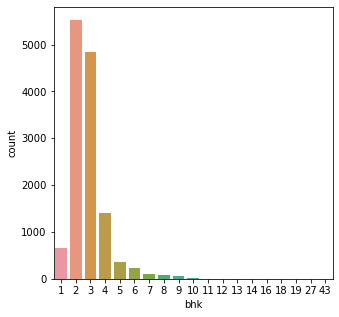

In [761]:
sns.countplot(x=df3['bhk'])

In [762]:
df3[df3.bhk>20].value_counts()

location                   size        total_sqft  bath  price  bhk
2Electronic City Phase II  27 BHK      8000        27.0  230.0  27     1
Munnekollal                43 Bedroom  2400        40.0  660.0  43     1
dtype: int64

In [763]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Converting range into numerical data if present

In [764]:
def checking_if_totalsqft_is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(checking_if_totalsqft_is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [769]:
def conversion_of_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [770]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(conversion_of_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


<AxesSubplot:ylabel='Frequency'>

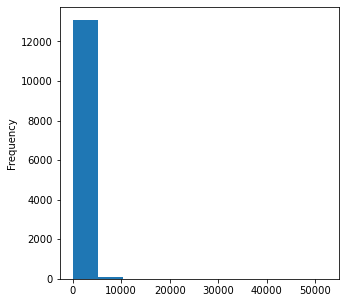

In [771]:
df4['total_sqft'].plot.hist()

### Addition of new feature sqft_price  and sqft_per_bhk for outlier analysis

In [772]:
df5=df4.copy()
df5['sqft_price']=df5['price']*100000/df5['total_sqft']
df5["sqft_per_bhk"] = df5['total_sqft'] /df5['bhk']
df5.head()

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


<AxesSubplot:ylabel='Frequency'>

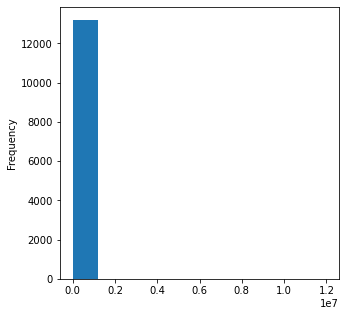

In [773]:
df5['sqft_price'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

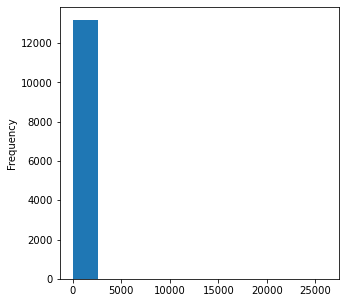

In [774]:
df5['sqft_per_bhk'].plot.hist()

## DIMENSIONALITY REDUCTION

In [775]:
len(df5.location.unique())

1304

In [776]:
df5['location'].dtype      # o means object

dtype('O')

## Relabelled few locations as other whose count was less than 10 as more location_count will increase number of columns in dataset

In [778]:
df5.location = df5.location.apply(lambda x: x.strip())
location_count = df5['location'].value_counts(ascending=False)
location_count

Whitefield                          535
Sarjapur  Road                      392
Electronic City                     304
Kanakpura Road                      266
Thanisandra                         236
                                   ... 
Housing Board Layout Vijay Nagar      1
Rainbow Drive                         1
Subhash Nagar                         1
Anathanagar                           1
Lalbagh Road                          1
Name: location, Length: 1293, dtype: int64

In [779]:
len(location_count[location_count<=10])

1052

In [780]:
location_count_is_less=location_count[location_count<=10]
location_count_is_less

Sector 1 HSR Layout                 10
1st Block Koramangala               10
Gunjur Palya                        10
Kalkere                             10
Nagadevanahalli                     10
                                    ..
Housing Board Layout Vijay Nagar     1
Rainbow Drive                        1
Subhash Nagar                        1
Anathanagar                          1
Lalbagh Road                         1
Name: location, Length: 1052, dtype: int64

In [781]:
len(df5.location.unique())

1293

In [782]:
def check_count(x):
    if x in location_count_is_less:
        return 'other'
    else:
        return x

In [783]:
df5.location=df5.location.apply(check_count)

In [784]:
len(df5.location.unique())

242

In [785]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.000000
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.000000
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248,585.000000
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101,683.000000
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182,825.000000
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275,436.666667
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804,170.000000


## OUTLIER DETECTION AND REMOVAL

In [786]:
df5['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [787]:
df5[df5['sqft_per_bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804,170.000000
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333,75.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810,234.500000
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296,168.750000
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000,166.666667


In [788]:
df5.shape

(13246, 8)

In [789]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [790]:
df6.sqft_per_bhk.describe()

count    12456.000000
mean       596.635185
std        387.540157
min        300.000000
25%        491.916667
50%        562.500000
75%        630.000000
max      26136.000000
Name: sqft_per_bhk, dtype: float64

<AxesSubplot:xlabel='sqft_per_bhk'>

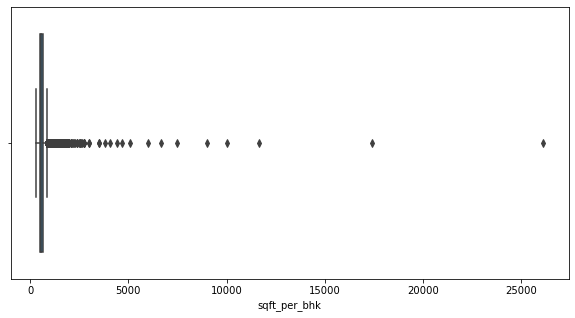

In [807]:
sns.boxplot("sqft_per_bhk",data=df6)

In [795]:
df6.sqft_price.describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: sqft_price, dtype: float64

<AxesSubplot:xlabel='sqft_price'>

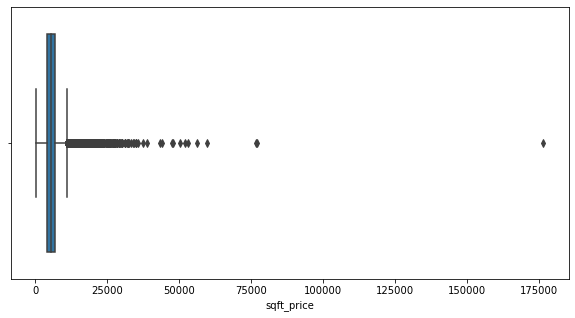

In [796]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot("sqft_price",data=df6)

In [797]:
def remove(data):
    df=pd.DataFrame()
    for key,val in data.groupby('location'):
        m=np.mean(val.sqft_price)
        st=np.std(val.sqft_price)
        check=(m-st)
        checkd=(m+st)
        df_r=val[(val.sqft_price>check) & (val.sqft_price<=checkd)]
        df=pd.concat([df,df_r],ignore_index=True)
    return df
df7=remove(df6)
df7.shape

(10241, 8)

(array([1.086e+03, 5.734e+03, 2.470e+03, 4.960e+02, 2.630e+02, 1.260e+02,
        3.900e+01, 1.700e+01, 5.000e+00, 5.000e+00]),
 array([ 1250.        ,  3575.98039216,  5901.96078431,  8227.94117647,
        10553.92156863, 12879.90196078, 15205.88235294, 17531.8627451 ,
        19857.84313725, 22183.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

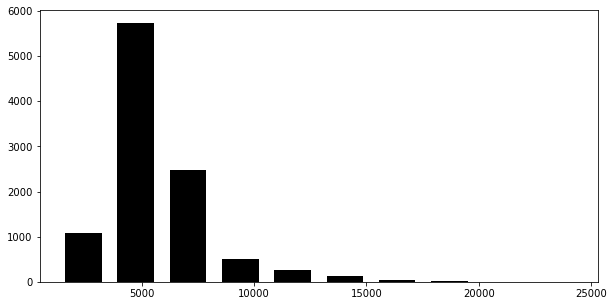

In [798]:
plt.hist(df7.sqft_price,rwidth=0.7,color='black')

<AxesSubplot:xlabel='bhk'>

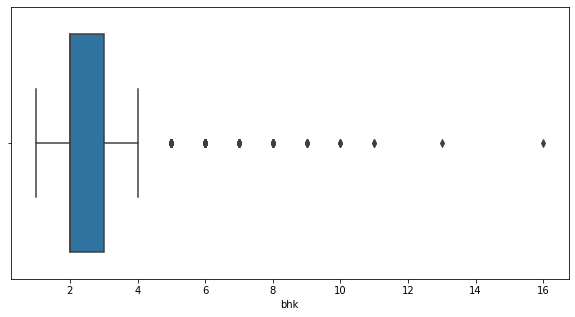

In [799]:
sns.boxplot("bhk",data=df7)

In [800]:
def removal(data):
    extra= np.array([])
    for location,lval in data.groupby('location'):
        #print(location)
        #print(lval)
        cnt_bhk= {}
        for bhk,bval in lval.groupby('bhk'):
            #print(bhk)
            #print(bval)
            cnt_bhk[bhk] ={'mean': np.mean(bval.sqft_price),'std': np.std(bval.sqft_price),'count': bval.shape[0]}
        #print('Dictionary storing bhk along with its features')
        #print(cnt_bhk)
        for bhk,bval in lval.groupby('bhk'):
            counts= cnt_bhk.get(bhk-1)
            #print('Information of previous bhk size less than current bhk')
            #print(counts)
            if counts and counts['count']>5:
                extra= np.append(extra, bval[bval.sqft_price<(counts['mean'])].index.values)
                #print('Anomalies')
                #print(extra)
    return data.drop(extra,axis='index')
df8= removal(df7)
df8.shape

(7329, 8)

In [801]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [802]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000,1200.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000,625.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000,545.454545
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424,417.307692


<AxesSubplot:xlabel='bath'>

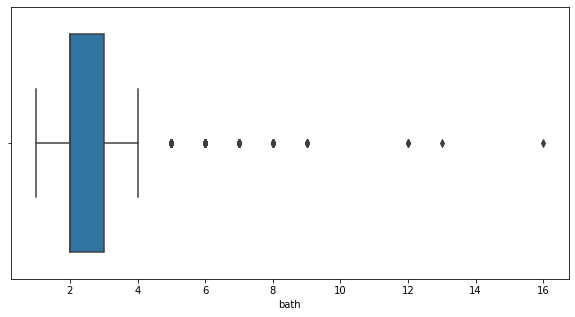

In [803]:
sns.boxplot(x="bath",data=df8)

In [804]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520,615.000000
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429,1750.000000
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330,602.000000
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689,1889.666667


In [805]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [806]:
df9.corr()["price"].sort_values(ascending=False)

price           1.000000
total_sqft      0.840997
sqft_price      0.716517
bath            0.601308
bhk             0.570145
sqft_per_bhk    0.485123
Name: price, dtype: float64

## Removal of added features as they are not much related to the price

In [844]:
df10 = df9.drop(['size','sqft_price','sqft_per_bhk'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


##  Data Visualisation

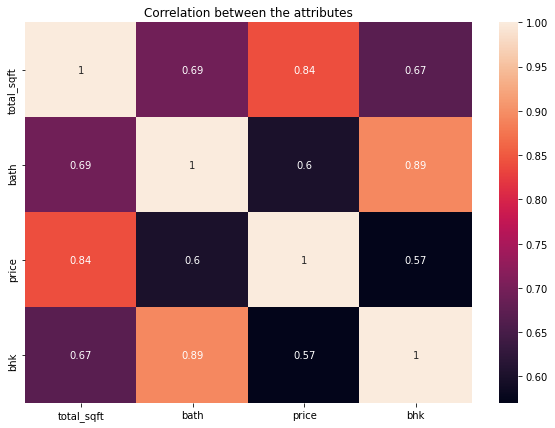

In [644]:
plt.figure(figsize=(10,7))
sns.heatmap(df10.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

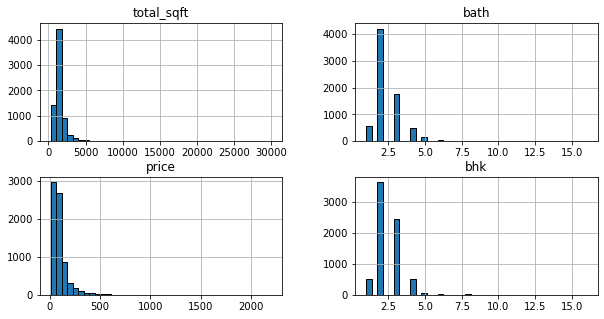

In [701]:
df10.hist(figsize=(10,5),bins=40,edgecolor="black")
plt.show()

<AxesSubplot:xlabel='total_sqft', ylabel='bhk'>

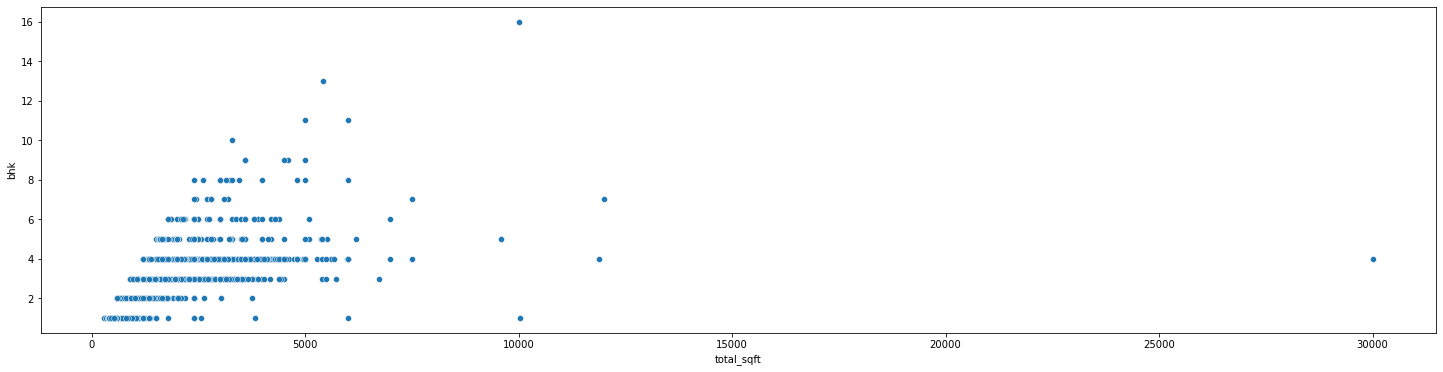

In [652]:
sns.scatterplot(x=df10['total_sqft'],y=df10['bhk'])

<AxesSubplot:xlabel='bath', ylabel='bhk'>

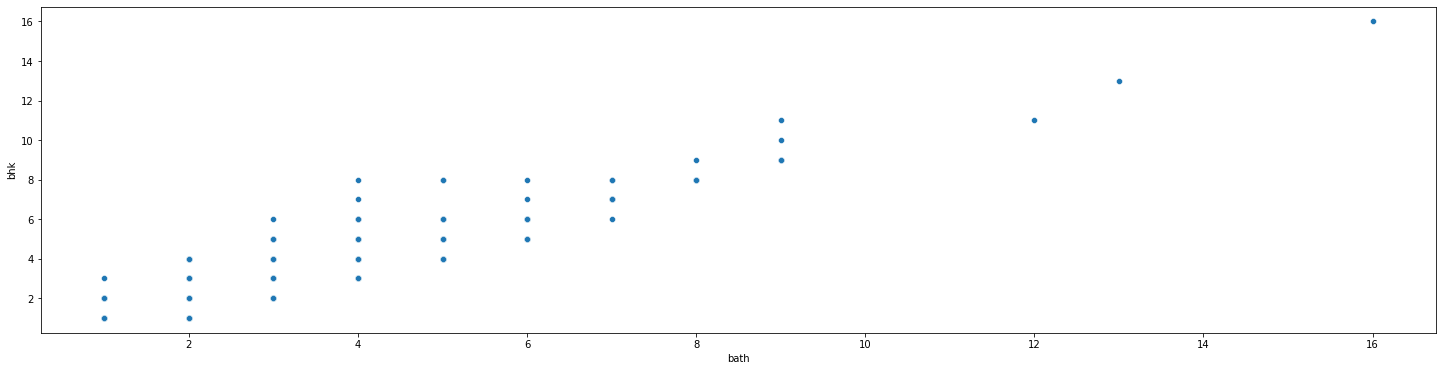

In [653]:
sns.scatterplot(x=df10['bath'],y=df10['bhk'])

<AxesSubplot:xlabel='bhk', ylabel='price'>

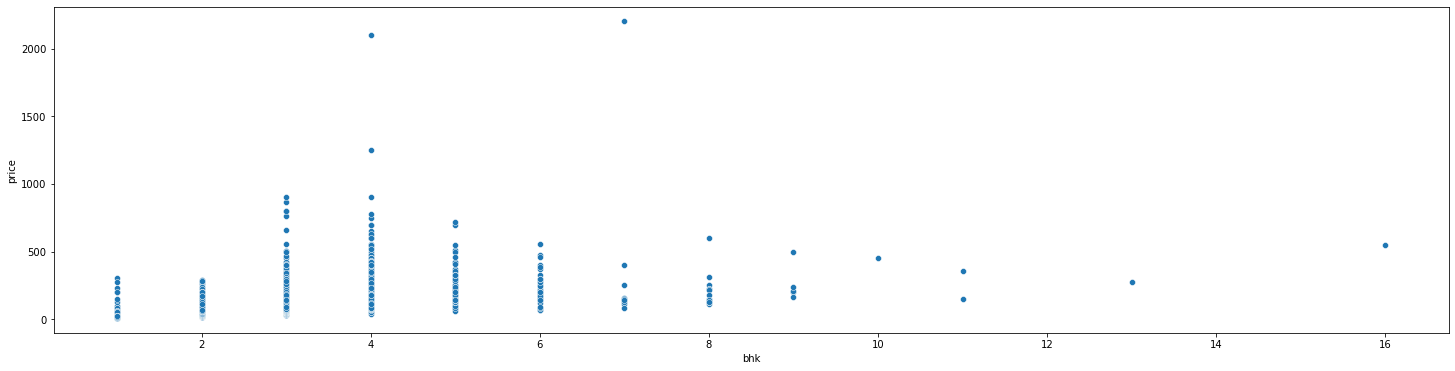

In [654]:
sns.scatterplot(x=df10['bhk'],y=df10['price'])

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

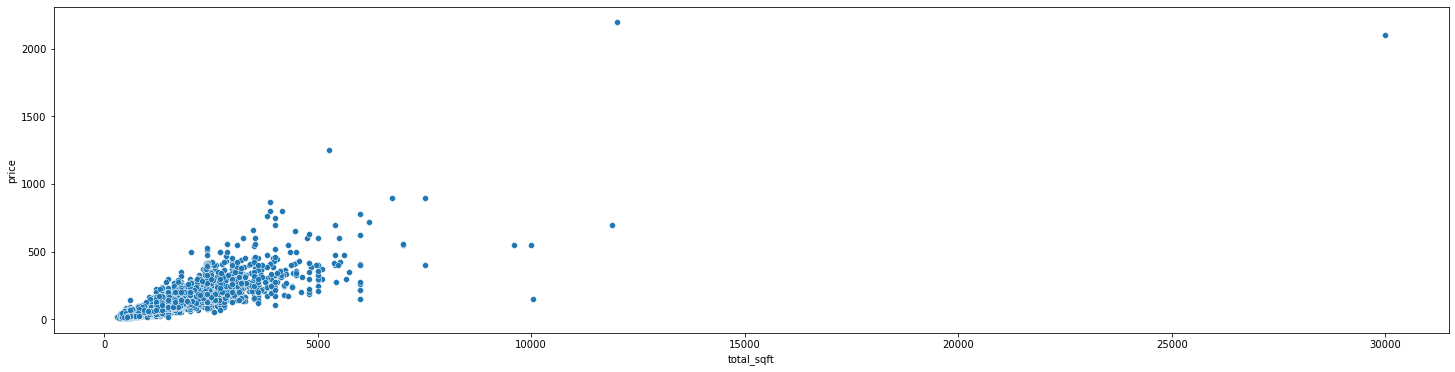

In [655]:
sns.scatterplot(x=df10['total_sqft'],y=df10['price'])

<AxesSubplot:xlabel='bhk'>

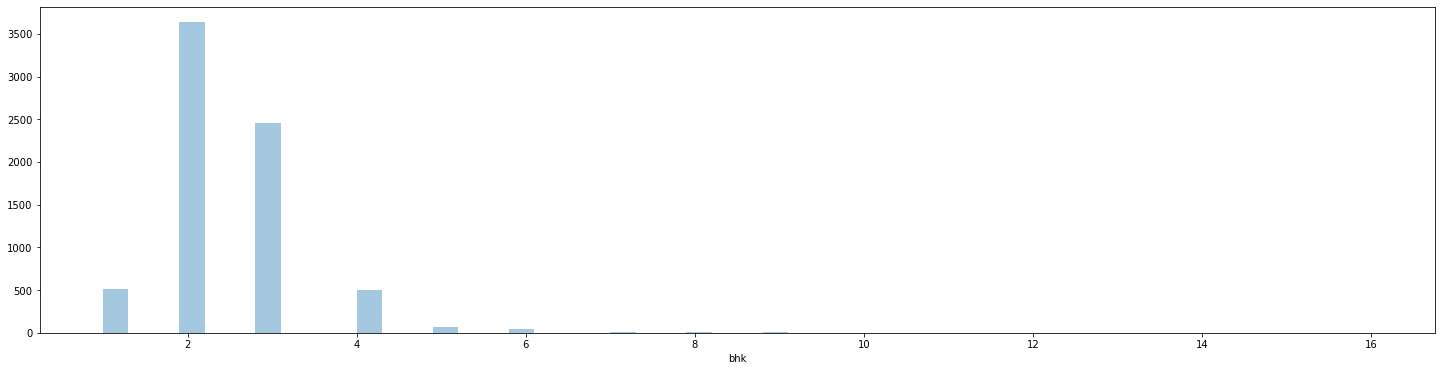

In [656]:
sns.distplot(df10['bhk'],kde=False)

## Handling Categorical data

#### Machine learning models cannot interpret text data so to deal with it we use one hot encoding i.e. dummies

In [657]:
df10.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

#### Using pandas dummies method

In [658]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [659]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [660]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [661]:
X = df12.drop(['price'],axis='columns')
X.head(3)
Y=X
Z=Y.drop(['bhk','bath','total_sqft'],axis='columns')

In [662]:
X.shape

(7251, 244)

In [663]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [664]:
len(y)
Z.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## COMPARISON OF MODELS

### TRYING DIFFERENT MODELS TO SELECT THE RIGHT ONE


## Splitting data

In [676]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [677]:
# put models in a dictionary
models={
        "Linear Regression":LinearRegression(),
        "Decision Tree":DecisionTreeRegressor(),
        "Random Forest":RandomForestRegressor(),
        "Lasso":Lasso()}

In [709]:
def fit_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given ml models
    models:dict of diff sklearn models
    x_train:training data(no labels)
    x_test:testing data (no labels)
    y_train:training labels
    y_test:testing labels
    """
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [710]:
model_scores=fit_score(models,X_train,X_test,y_train,y_test)
model_scores

{'Linear Regression': 0.8452277697874312,
 'Decision Tree': 0.7241860294606068,
 'Random Forest': 0.7977602013650419,
 'Lasso': 0.7237775279429011}

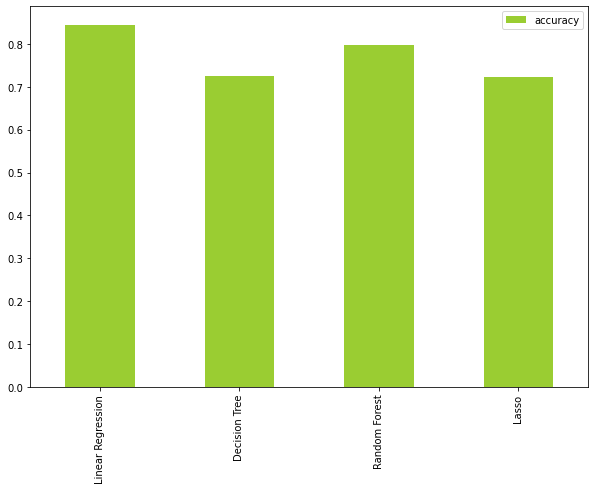

In [711]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar",figsize=(10,7),color="yellowgreen");

In [681]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
reg_model.score(X_test,y_test)

0.8452277697874312

In [682]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [683]:
def housing_price_prediction(location,sqft,bath,bhk):    
    loc= np.where(X.columns==location)[0][0]

    house_data = np.zeros(len(X.columns))
    house_data[0] = sqft
    house_data[1] = bath
    house_data[2] = bhk
    if loc >= 0:
        house_data[loc] = 1

    return reg_model.predict([house_data])[0]

In [684]:
housing_price_prediction('Ambedkar Nagar',5000, 5, 5)

378.48896002772113

In [841]:
df12['total_sqft'].sort_values()

5212      300.0
7834      350.0
465       351.0
5859      360.0
2326      360.0
         ...   
8575    10000.0
9671    10030.0
7180    11890.0
4903    12000.0
8413    30000.0
Name: total_sqft, Length: 7251, dtype: float64

## REQUIREMENTS FOR WEB APP

In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(reg_model,f)

import json
columns = {
    'data_columns' : [col.lower() for col in Z.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))